<a id='top'></a>

# CSCI3022 S22


# Exam 2 Coding

## Due Tuesday, May 3 at 11:59 pm to Canvas and Gradescope
***

**Name**: Matthew Su

***

This exam coding segment is due on Canvas by **11:59 PM on Tuesday May 3*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this exam coding assignment or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the exam coding nor can you drop your exam coding grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a exam coding clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The exam coding assignmnet is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Bottom](#bot)

---

In [2]:
#old stalwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


[Back to top](#top)

<a id='p1'></a>
## (40 pts) Problem 1: Simulation and Hypothesis Testing
***

One measure we're often interested in for modeling is whether or not our data "looks" normally distributed. We have explored two diagnoses for this briefly whereby we compare histograms of residuals or "QQ" plots of residuals to the corresponding results of the normal. 

In tihs problem we'll explore a simplified variant of another common diagnostic that's **more general** for whether or a not a list of numbers comes from a specified distribution.  I recommend skimming [this link](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) about the Kolmogorov-Smirnov test.  Before we begin.



### A) How Similar are two distributions?

Consider trying to tell somebody that the uniform random variable $X \sim U[-2,2]$ is "very different" from the Normal $Z \sim N(0,1)$.  How would you do so?  We could plot their *pdf*s, but the **height** of a pdf is pretty meaningless, since probability lives in **area**.  Instead, we could maybe compare their **cdfs**.

Your task:

- Create a `linspace` of 1,000 values from -4 to 4.
- At those values as the $x$-axis, make a plot with two lines: the cdf of $Z$ and the cdf of $X$ as given above
- Print $\max_y |F_Z(y)-F_X(y)|$, the **maximum** value of the absolute *difference* between the cdfs $F_Z$ and $F_X$ at your linspace locations.  In other words: how far vertically apart were the two cdfs at their *most* far apart location?

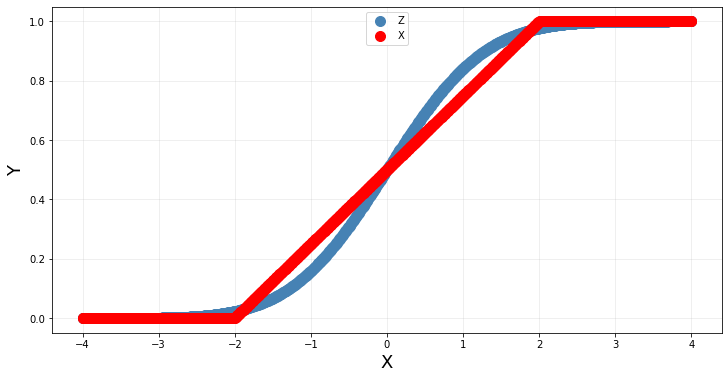

In [3]:
np.random.seed(1234)
# xu = stats.uniform.rvs(-2,2,1000)
# xn = stats.norm.cdf(stats.norm.rvs(0,1,size=len(x)))

x = np.linspace(-4,4,1000)
xy = np.linspace(-2,2,1000)
y = stats.norm.cdf(x)

yun = np.sort(np.random.uniform(low=-2,high=2,size = 1000))
yu = stats.uniform.cdf(x,loc=-2,scale=4)

# Z ~ N(0,1)
df = pd.DataFrame({"x": x, "y": y})
# X ~ U[-2,2]
du = pd.DataFrame({"x":x,"y":yu})


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.scatter(df["x"], df["y"], s=100, color="steelblue", label = "Z")
ax.scatter(du["x"], du["y"], s=100, color="red", label = "X")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("Y", fontsize=18)
leg = plt.legend(loc='upper center')



In [4]:
max = 0

for i in range (1000):
    m = y[i]-yu[i]
    if(m >= max):
        max = m

print (stats.ks_2samp(yu,y))



KstestResult(statistic=0.25, pvalue=7.613348817400856e-28)


### B) How about *data* versus a distribution?

You should agree that it should maybe be possible to tell two random variables apart from their cdfs.  But what about data **from** a distribution?  This means we have noise or randomness, and it's harder to tell the difference between similar distributions!

Our tool for this is called the **empirical** cumulative density function ([ecdf]([https://en.wikipedia.org/wiki/Empirical_distribution_function])), which is roughly equivalent to the cdf version of a histogram: draw a picture of the *observed* cdf, which naturally will be a little "blocky" like a histogram.

Formally, the ecdf of a data set $X$ with $n$ observations is given by:

$$ecdf_X(x)=\frac{\text{# of elements of X that are less than or equal to x}}{n}$$

You can implement this function by hand, but you may also use `statsmodels.distributions.empirical_distribution.ECDF`.


Your task:

- **Simulate** 100 numbers from $X \sim U[-2,2]$ (see `stats.uniform.rvs` for syntax)
- Create a `linspace` of 1,000 values from -4 to 4.
- Using the `linspace` values as the $x$-axis, again make a plot with two lines: the cdf of the normal $Z$ but this time compared to the ecdf of the simulated $X$ values.
- Print $\arg \max_y |F_Z(y)-ecdf_X(y)|$, the **maximum** value of the absolute *difference* between the cdfs $F_Z$ and $F_X$ at your linspace locations.
- How does it compare to the "true" value in part A?  Run your code a few times and report at least 5 such values.

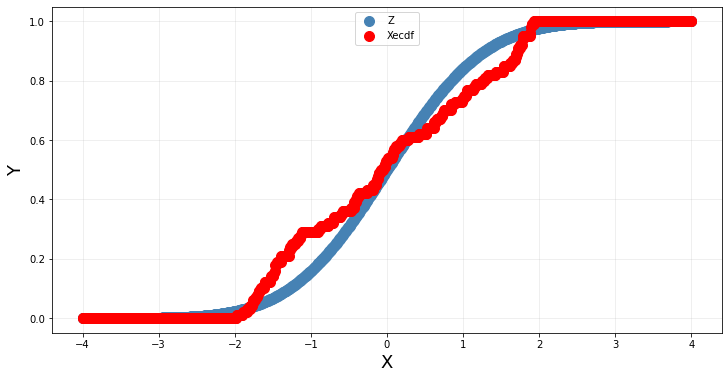

In [5]:
import statsmodels

x = np.linspace(-4,4,1000)
y = stats.norm.cdf(x)

xu = stats.uniform.rvs(-2,4,100)
stack = ((x,xu))
yul = statsmodels.distributions.empirical_distribution.ECDF(xu) 

yulx = np.sort(yul.x)
yuly = np.sort(yul.y)

# print (yul(x))


# print(len(yu.x))
# print (yu.x)
# # Z ~ N(0,1)
df = pd.DataFrame({"x": x, "y": y})
# X ~ U[-2,2]
# du = pd.DataFrame({"x":x,"y": np.delete(yu,1000)})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.scatter(df["x"], df["y"], s=100, color="steelblue", label = "Z")
ax.scatter(x,yul(x), s=100, color="red", label = "Xecdf")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("Y", fontsize=18)
leg = plt.legend(loc='upper center')

In [6]:
max = 0
array = yul(x)
# print(array[500])

cu = yul(stats.uniform.rvs(-2,4,100))
hu = yul(stats.uniform.rvs(-2,4,100))
bu = yul(stats.uniform.rvs(-2,4,100))
yu = yul(stats.uniform.rvs(-2,4,100)) 

print (stats.ks_2samp(y,array))
print (stats.ks_2samp(y,cu))
print (stats.ks_2samp(y,hu))
print (stats.ks_2samp(y,bu))
print (stats.ks_2samp(y,yu))

print("Compared to the true values in part A, the absolute difference is roughly the same, with a +0.05 variance between random datasets. This difference can be attributed to the random nature between datasets")
    

KstestResult(statistic=0.259, pvalue=7.053692183224609e-30)
KstestResult(statistic=0.351, pvalue=1.7911550020954792e-10)
KstestResult(statistic=0.311, pvalue=2.8216055492080727e-08)
KstestResult(statistic=0.289, pvalue=3.4395770298623063e-07)
KstestResult(statistic=0.339, pvalue=8.769697190658121e-10)
Compared to the true values in part A, the absolute difference is roughly the same, with a +0.05 variance between random datasets. This difference can be attributed to the random nature between datasets


### C) How about for Normals?

The **distribution** of the numbers you compute in part $B$ is the basis of one measure for whether or not *data* fits a *proposed* distribution.  Our goal is to create a hypothesis test from scratch (recall HW6 # 3 for a similar concept) that gives us the ability to figure out how big of a distance we should get for these measures if the data **does** match the proposed distribution.

In other words, we're going to simulate from the null hypothesis and use it to apply to data.  Our motivating example is the `hubble.csv` data from HW7 and nb15, which had 24 observations.

**C1)** Your task:
- 1) Simulate 24 data points $X$ from the $N(4,10)$ distribution.
- 2) **Standardize** $X$ by converting it to a vector of Z-score: $X=\frac{X-\bar{X}}{S_X}$
- 3) At the same linspace as in parts A/B, compute the maximum distance between the ecdf of the standarized $X$ and the cdf of the N(0,1)$.
- Repeat steps 1-3 1000 times until you have a simulated distribution of max distances observed.


In [7]:
result = []

# cdf of N(0,1)
x = np.linspace(-4,4,1000)
cdf = stats.norm.cdf(x,loc = 0, scale = 1)

for j in range (1000):
    hub = np.random.uniform(low=4,high=10,size = 24)
    stan = []
    mean = np.mean(hub)
    std = np.std(hub)
    for i in range (24):
        convert = (hub[i]-mean)/std
        stan.append(convert)
    
    n = statsmodels.distributions.empirical_distribution.ECDF(stan)
    no = n(x)
    k = stats.ks_2samp(cdf,no) 
    result.append(k.statistic)


**C2) ** Make a histogram of your simulated max values observed.

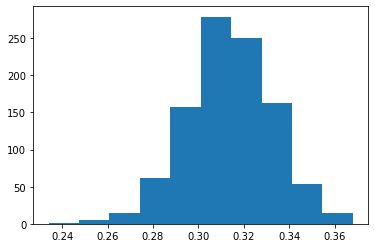

In [8]:
plt.hist(result)
plt.show()
# print(k)

**C3) ** Create a one-tailed hypothesis test corresponding to the *alternative* hypothesis of "the data does not come from the normal distribution" by using a test that rejects the null hypothesis if the distance between ecdf and cdf is $>c$ for some $c$.  If your tolerance for type I error is .10, what do you choose for $c$ on a data set of 24 observations?


In [9]:
set24 = np.random.uniform(low=4,high=10,size = 24)
mean24 = np.mean(result)

print ("c for data set of 24 obvs :", np.percentile(mean24,10))


c for data set of 24 obvs : 0.31343400000000005


**C4) ** Apply your hypothesis test in part C3 to the `hubble.csv` data by standardizing it and computing its ecdf's distance-from-normal.  The hubble data doesn't **look** very normal, but could we actually conclude that it definitely wasn't normal?  What does this tell you about data sets with only 24 observations?


In [10]:
# Path to the data - select the path that works for you 
file_path = '../data/hubble.csv'

x = np.linspace(-4,4,1000)
cdf = stats.norm.cdf(x,loc = 0, scale = 1)

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

stan = []
mean = np.mean(df["y"])
std = np.std(df["y"])
for i in range (24):
    convert = (hub[i]-mean)/std
    stan.append(convert)

n = statsmodels.distributions.empirical_distribution.ECDF(stan)
no = n(x)
k = stats.ks_2samp(cdf,no) 

print(k)


KstestResult(statistic=0.727, pvalue=3.8721461423518834e-256)


Based on our returned values, we can determine that based on our p value our null hypothesis is indeed very incompatible with our data set. For the scope of the source of the data observations, we can say that 24 observations does not yield expected normal behaviour. Data sets with only 24 observations, especially given the context of this data set, is not useful enough to back a null hypothesis. 


---
[Back to top](#top)
<a id='p3'></a>
## (60 pts) Problems 2-3: Regression


The [Anage](https://genomics.senescence.info/species/index.html) database is a large repositiory of biological information, and includes various properties of various animals with an eye towards understanding the effects of aging in different species.  Most of the columns should be self-explanatory, but for more information you can consult their overview, [here](https://genomics.senescence.info/help.html#anage).

A couple of [acronyms](https://genomics.senescence.info/software/demographic.html) in the columns: IMR stands for "initial mortality rate," and represents non-age related deaths.  MRDT is the "mortality doubling rate," and is a measure for the age-related species deaths.

Unlike the *descriptive* analysis we did of this data set in the first exam coding, on this problem we will attempt to handle *prediction*.  As before, we will target the birth weight column, this time as the **response** to a linear model. 

The data is loaded in with a couple of preliminary explorations below.

In [11]:
df=pd.read_csv('../data/AnAge.csv', encoding='UTF-8')
print(df.columns) #information available: many numeric columns are blank for many species
print(df.shape) #4224 species available
df.head(3)

Index(['HAGRID', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Species', 'Common name', 'Female maturity (days)',
       'Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
       'Litter/Clutch size', 'Litters/Clutches per year',
       'Inter-litter/Interbirth interval', 'Birth weight (g)',
       'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
       'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
       'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
       'Body mass (g)', 'Temperature (K)', 'References'],
      dtype='object')
(4224, 31)


,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3.0,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1.294130e+11
1,5.0,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,2.203250e+37
2,6.0,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,6.340740e+54


## (40 pts) Problem 2: Single-Predictor Regression

### A) A naive model
Suppose our goal is to predict the `Birth weight (g)` of a species using only its `Temperature (K)`.  

Your task:
- Create a new data frame with only these two columns.  Then drop any rows with missing observations.
-  Make a linear model with birth weight as the response, predicted by temperature.  Print the summary table, and write the final model in a markdown cell.
- Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.
- Does this model seem appropriate?  For each of the 4 major assumptions of the simple linear regression model, use your plots in part B to decide whether or not the data set meets those assumptions (don't spend too much time here, just look things over!)


In [23]:
# Trimmed and cleaned dataframe

dbt = df[['Birth weight (g)','Temperature (K)']].dropna()
print(dbt.head())

# Lin Reg Model

print((sm.regression.linear_model.OLS(dbt['Birth weight (g)'],sm.add_constant(dbt['Temperature (K)'])).fit()).summary())
model = sm.regression.linear_model.OLS(dbt['Birth weight (g)'],sm.add_constant(dbt['Temperature (K)'])).fit()

# Line of best fit

print('Coefficients: ', model.params)
print('Best fit line was: BW (g)=', np.round(model.params[0],5), '+(', np.round(model.params[1],5),')* Temp (k)')


      Birth weight (g)  Temperature (K)
1530              7.67           307.85
1531              0.70           303.95
1532             11.50           308.15
1533              3.95           304.05
1534              3.60           303.95
                            OLS Regression Results                            
Dep. Variable:       Birth weight (g)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08965
Date:                Sat, 30 Apr 2022   Prob (F-statistic):              0.765
Time:                        19:06:11   Log-Likelihood:                -4853.3
No. Observations:                 386   AIC:                             9711.
Df Residuals:                     384   BIC:                             9719.
Df Model:                           1                                         
Covariance Type:            nonrobust            

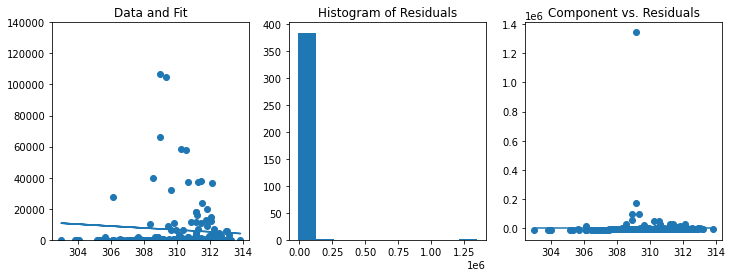

In [54]:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(dbt['Temperature (K)'], dbt['Birth weight (g)'])
ax[0].plot( dbt['Temperature (K)'], model.fittedvalues)
ax[0].set_ylim([0,140000])
ax[0].set_title('Data and Fit')
ax[1].hist(model.resid, bins = 10)
# ax[1].set_xlim([0,1000000])
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(dbt['Temperature (K)'], model.resid)
# ax[2].set_ylim([0,140000])
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(dbt['Temperature (K)']), xmax=np.max(dbt['Temperature (K)']))

- Linear Relationship (Are x and y related in any way?): Based on the leftmost graph 1, it is hard to say if any significant relationship exists based on wild outliers and our trend line exists only in the bottom 1/4 of this scatter plot.
- Independence : Our Durbin Waston test returned a result of 1.724. Being within range of 1.5 and 2.5, that means that we don't have a serious autocorrelation issue in our data and is not a concern. A majority of x values have similar signs of error, but this is not reflective of all data points.
- Homoscedasticity (Is our variance constant at every level of x?): The rightmost graph 3 gives us a good idea of if our data suffers from heteroscedasticity, making it harder to trust. Graph 3 has huge variance between x values and certain outliers. Given the degree of variance, not great. 
- Normality (Are the residuals normally distributed?): We can assume that the dataset and the residuals are not normally distributed at all. This is refected in our graph 2. It is very much right skewed. When exploring birth weight and frequency in exam 1, it was also observed that values stemming from using birth weight as x would result in right skewed behaviour as well.

### B) A better model

You should have **emphatically** decided that there were problems in your model.  But you may already have known this: the `Birth weight (g)` is logarithmic, so it might make sense for our erorrs to be as well.  One solution is to **replace** `Birth weight (g)` as our target with the logarithm of birth weight instead, and then try to predict *that* using `Temperature (K)`.

Your task: repeat all 5 steps of the analysis in part A, this time using the natural logarithm of `Birth weight (g)` as the response variable.
- Create a new data frame with only these two columns.  Then drop any rows with missing observations.
-  Make a linear model with log birth weight as the response, predicted by temperature.  Print the summary table, and write the final model in a markdown cell.
- Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.
- Does this model seem appropriate?  For each of the 4 major assumptions of the simple linear regression model, use your plots in part B to decide whether or not the data set meets those assumptions.
- Does your data set appear to have outliers?

In [66]:
# Trimmed and cleaned dataframe

dbu = df[['Birth weight (g)','Temperature (K)']].dropna()
# print(dbt.head())

# Lin Reg Model

print((sm.regression.linear_model.OLS(np.log(dbu['Birth weight (g)']),sm.add_constant(dbu['Temperature (K)'])).fit()).summary())
modellog = sm.regression.linear_model.OLS(np.log(dbu['Birth weight (g)']),sm.add_constant(dbu['Temperature (K)'])).fit()

print('Coefficients: ', modellog.params)
print('Best fit line was: BW (g)=', np.round(modellog.params[0],5), '+(', np.round(modellog.params[1],5),')* Temp (k)')

                            OLS Regression Results                            
Dep. Variable:       Birth weight (g)   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     45.43
Date:                Sun, 01 May 2022   Prob (F-statistic):           5.82e-11
Time:                        13:17:07   Log-Likelihood:                -999.58
No. Observations:                 386   AIC:                             2003.
Df Residuals:                     384   BIC:                             2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -193.7007     29.225     

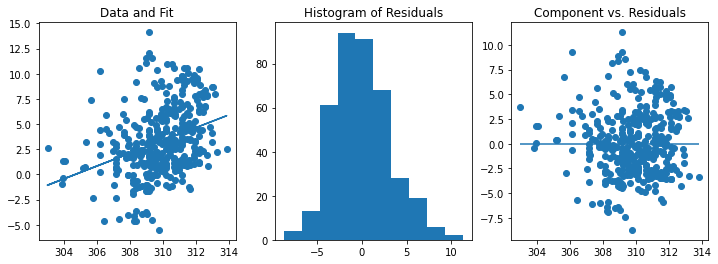

In [68]:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(dbu['Temperature (K)'], np.log(dbu['Birth weight (g)']))
ax[0].plot( dbu['Temperature (K)'], modellog.fittedvalues)
ax[0].set_title('Data and Fit')
ax[1].hist(modellog.resid, bins = 10)
# ax[1].set_xlim([0,1000000])
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(dbu['Temperature (K)'], modellog.resid)
# ax[2].set_ylim([0,140000])
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min((dbu['Temperature (K)'])), xmax=np.max(dbu['Temperature (K)']))

- Linear Relationship (Are x and y related in any way?): Based on the leftmost graph 1, we can start to see an upward trend between temp and birth weight. It is not optimal, but significantly better than our result in part A. 
- Independence: Our Durbin Waston test returned a result of 0.484. Being below 2, that means that we have evidence of a posititve serial correlation. We can see in graph 1 that the spread of posititve to negative values is off balance by quiet a bit, which is worthy of concern. This can most likely be attributed to remaining outliers among other issues with the 1:1 data put into this SLRM. 
- Homoscedasticity (Is our variance constant at every level of x?): The rightmost graph 3 gives us a good idea of if our data suffers from heteroscedasticity, making it harder to trust. Graph 3 has improved substaintially, making our variance within 2 digits compared to before. +/- error is also consistant and looks much better. 
- Normality (Are the residuals normally distributed?): We can assume that the dataset and the residuals are distributed much more normally than previously observed. This is refected in our graph 2. It still shows charactersitics of being right skewed, but is significantly improved and more closely resembles a bell curve. Definetly a significant improvement.


#### Part C) Improvements: 

If the data set violated any assumptions in part B, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another table and set of plots as in parts A and B of the new fit and the new residuals.


Then, write a sentence or two describing your thought process.  If you did not adjust a model, why not?  If you did, what are the effects?

On a baseline level, all I did was process the data again in a new data sheet AnAgep.csv (I will try to link the actual doc, may be as a google spreadsheet). I did all the data processing in the spreadsheet itself (remove null rows), then I arbitrarily removed some of what I considered to be egregious outliers. This generally applied to larger animals with massive birth weights but similar temps, so they naturally would have skewed our data significantly if we tried to predict birth weight based on temp. A 7 figure animal birth weight had the same temp as an animal a fraction of the weight. Removing these outliers (some animals were huge but had very low temps compared to others their size, those were purged as well) and recreating part B resulted in much better outcomes overall. Every major assumption result was significantly improved yet again. Based purely on test results alone, R^2 improved 50% to 0.147, another massive jump considering the small effort applied to the data. JB and DW values were also much improved, which meant that our errors were more normally distributed, and we found much less positive autocorrelation and a smaller size of variance between values. At this point future changes could include focusing this data to account for animal types, such as cold-blooded vs warm-blooded, family, etc. That would allow for more precise predicition since organisims vary significantly.   

Index(['Birth weight (g)', 'Temperature (K)'], dtype='object')
(375, 2)
                            OLS Regression Results                            
Dep. Variable:       Birth weight (g)   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     64.27
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.41e-14
Time:                        13:48:09   Log-Likelihood:                -933.96
No. Observations:                 375   AIC:                             1872.
Df Residuals:                     373   BIC:                             1880.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

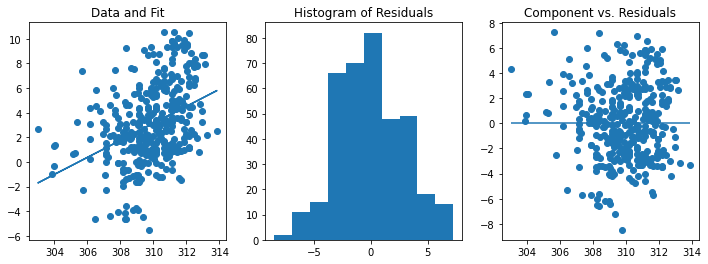

In [71]:
dp=pd.read_csv('../data/AnAgeP.csv', encoding='UTF-8')
print(dp.columns) #information available: many numeric columns are blank for many species
print(dp.shape) #4224 species available
dp.head(3)

print((sm.regression.linear_model.OLS(np.log(dp['Birth weight (g)']),sm.add_constant(dp['Temperature (K)'])).fit()).summary())
modelp = sm.regression.linear_model.OLS(np.log(dp['Birth weight (g)']),sm.add_constant(dp['Temperature (K)'])).fit()

print('Coefficients: ', modelp.params)
print('Best fit line was: BW (g)=', np.round(modelp.params[0],5), '+(', np.round(modelp.params[1],5),')* Temp (k)')

fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(dp['Temperature (K)'], np.log(dp['Birth weight (g)']))
ax[0].plot( dp['Temperature (K)'], modelp.fittedvalues)
ax[0].set_title('Data and Fit')
ax[1].hist(modelp.resid, bins = 10)
# ax[1].set_xlim([0,1000000])
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(dp['Temperature (K)'], modelp.resid)
# ax[2].set_ylim([0,140000])
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min((dp['Temperature (K)'])), xmax=np.max(dp['Temperature (K)']))

<br>

---
[Back to top](#top)
<a id='p3'></a>

## [20 points] Problem 3: Go Big: Multiple Linear Regression

This problem is an open-ended problem where we will approach the same problem as in #2 but you may use more columns in the context of Multiple Linear Regression.  

Your goal is to demonstrate that you have an understanding of how to choose between columns and validate/check for problems in a multiple linear regression problem.  

The data set has been scrubbed to only include non-missing values of the following columns:
- The numerical column `Gestation/Incubation (days)`
- The numerical column `Litter/Clutch size`
- The numerical column `Maximum longevity (yrs)`
- The numerical column `Temperature (K)`
- The numerical column `Weaning (days)`

It also includes the **categorical** column `Order`, which you may use as a categorical predictor (use `pd.get_dummies`).  Use of this column make the problem harder, but will generate better fits.  Using it and carefully determining **which** orders can be used to help prediction is worth up to 5 points of extra credit.

The target/response is still `Birth weight (g)`, but as before you should apply a logarithm to it.

In [73]:
dfmlr=df[['Birth weight (g)','Common name' , 'Order', 'Gestation/Incubation (days)', 'Litter/Clutch size',\
          'Weaning (days)', 'Maximum longevity (yrs)', 'Metabolic rate (W)', 'Temperature (K)']]
dfmlr=dfmlr.dropna()
print(dfmlr.shape)
dfmlr.head(3)

(234, 9)


,Birth weight (g),Common name,Order,Gestation/Incubation (days),Litter/Clutch size,Weaning (days),Maximum longevity (yrs),Metabolic rate (W),Temperature (K)
1530,7.67,Lesser hedgehog tenrec,Afrosoricida,55.0,6.00,29.0,19.0,0.750,307.85
1532,11.50,Streaked tenrec,Afrosoricida,59.0,4.00,21.0,2.7,0.380,308.15
1533,3.95,Dobson's shrew tenrec,Afrosoricida,61.0,2.67,29.0,5.6,0.315,304.05




**Rubric Notes:**
This problem is by design very open-ended.  It is meant to reflect a real-world problem solving process.  For this problem, at the very least, you should:
- Include and explain which method you're using to remove redundant columns in part B
- Include a (short) sentence for **each** of the diagnositic plots in part C, determining whether your current model is meeting the standard assumptions of multiple linear regression
- Include some code, sentences, and/or visualizations demonstrating what *alternative models* you tried and/or considered.
- Include a sentence interpreting why your final model **makes sense** in the context of the problem - and it if doesn't, you'll want to try to explain why not.

Graders will look for the both the diagnostic plots and **plenty** of complete English sentences describing what you're doing and why you think it will help answer the data science question: how do we create the best model we can to quantify how price can be explained and predicted by the features of the house.

As a quick heuristic: you should be able to find models with adjusted $R^2$ to above 75% using only minor adjustments on the initially provided numerical columns, and above 90% if youuse the categorical column.

** Part 3 A: Explore**

Make pairwise scatter plots of the continuous predictors/covariates, both against each other and against the outcome (log weight).   Does the relationship between the independent variables and the dependent variables appear to be linear?  Do there appear to be independent variables that are collinear?

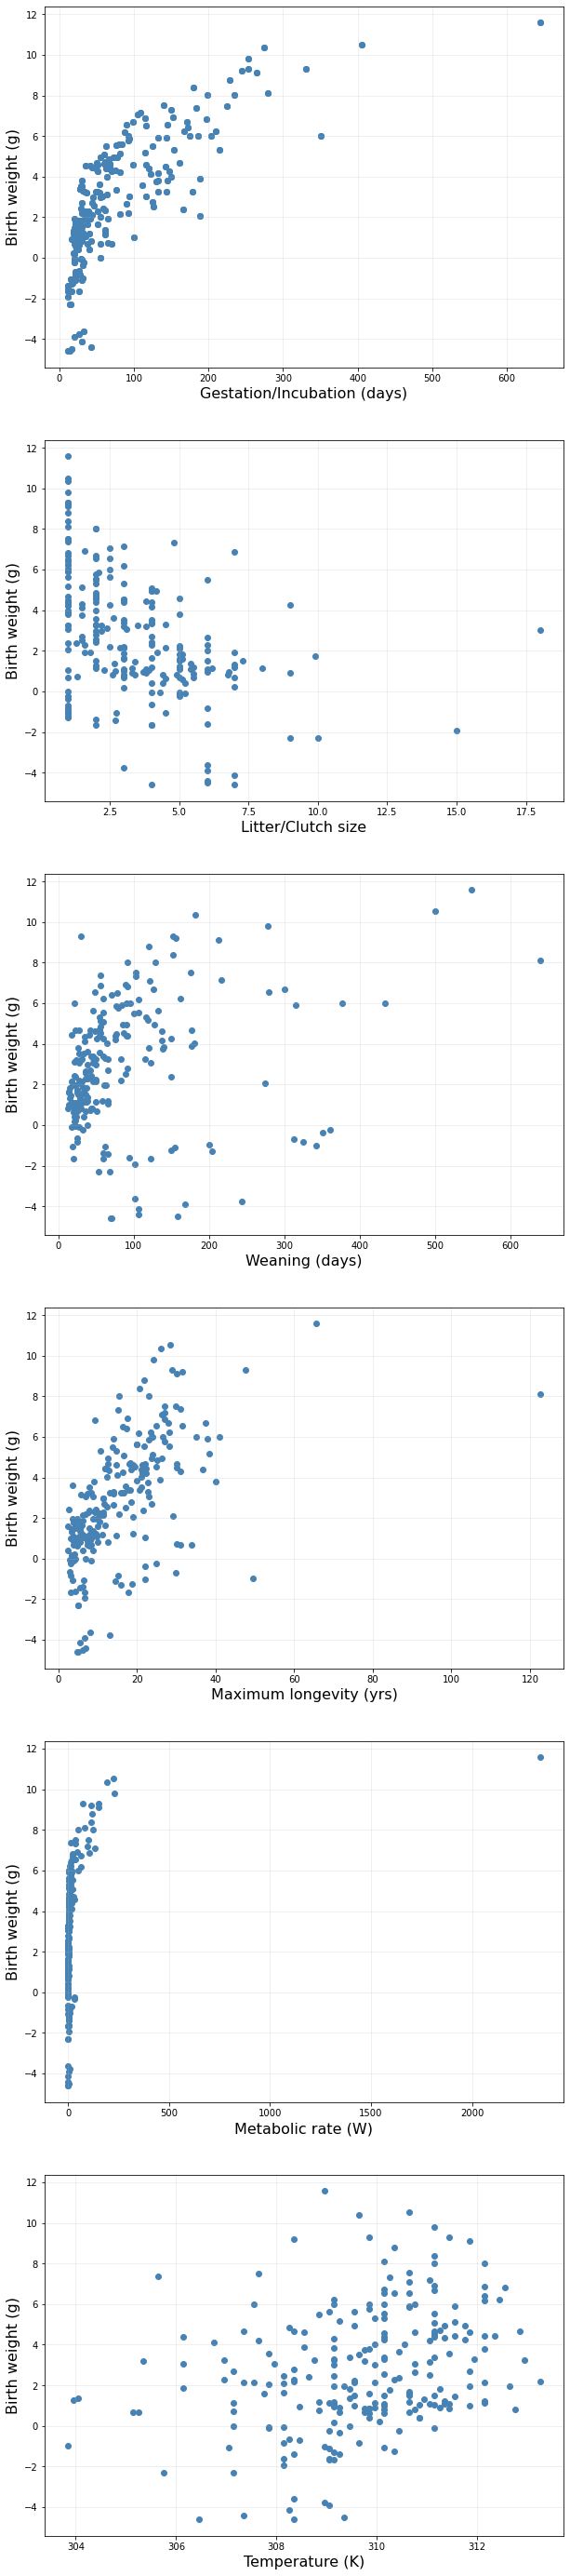

In [91]:
media = ['Gestation/Incubation (days)', 'Litter/Clutch size',\
          'Weaning (days)', 'Maximum longevity (yrs)', 'Metabolic rate (W)', 'Temperature (K)']

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10,50))
# Log for birth weights was used to get graphs that could actually be analyzed
axes[0].scatter(dfmlr["Gestation/Incubation (days)"],np.log(dfmlr["Birth weight (g)"]) )

for axi, m in enumerate(media):
    # axes[axi].set_title(m) 
    axes[axi].scatter(dfmlr[m], np.log(dfmlr["Birth weight (g)"]), color="steelblue")
    axes[axi].grid(alpha=0.25)
    axes[axi].set_xlabel(m, fontsize=16)
    axes[axi].set_ylabel("Birth weight (g)", fontsize=16)

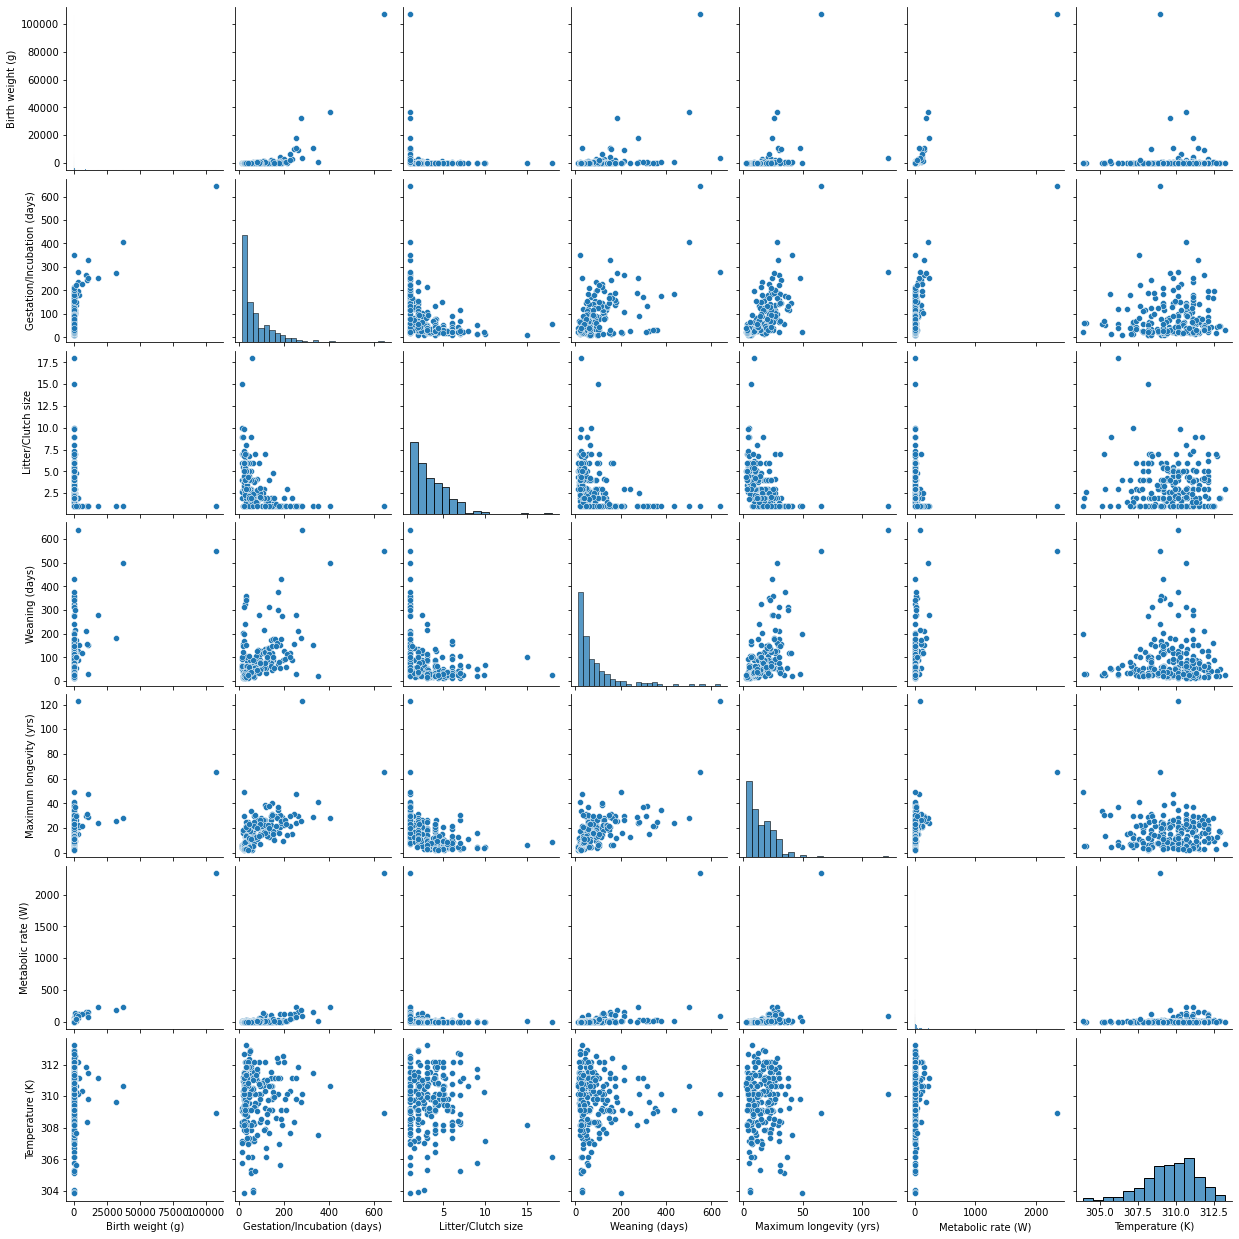

In [92]:
## ALTERNATIVE!  Pairs plots!
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(dfmlr)

Does the relationship between the independent variables and the dependent variables appear to be linear?  Do there appear to be independent variables that are collinear?

A. Of note, only maximum longevity and gestation/incubation time in days have noticable linear correlation with outcome, compared to all other fields including temperature, of which outliers are far less devestating. 

** Part 3 B: Make a Model**

By adding columns to a minimal model or by subtracting columns from the full model, use one of the criteria in the class to create a reasonable candidate model.  These may include:

- stepwise optimization of adjusted $R^2$
- stepwise inclusion/removal of most or least-significant T-tests on coefficients
- removing columns based on VIFs

Use a markdown cell to explain exactly what method you're using to construct your model.

** Part 3 C: Validate your Model**


Perform a thorough discussion of the underlying regression assumptions of your model in part 1B.  You should plot a predictor vs. residuals plot for each column and histogram OR qqplot of the overall residuals.  Make sure to also check for non-linearity, which lives in the predictor vs. residuals plots for each column.  

*Hint:* Consider applying similar functions to your predictor columns as you did to the response, as they're also in similar all-positive, right-skewed units.

** Part 3 D: Tune your Model**


Based on your work in parts 1B and 1C, **iterate** on your model.  Consider removing terms or adding higher-order polynomials one at a time unless you are satisfied that your model captures the data as well as possible.  Each time you add or subtract a term from your model, you should repeat the steps in parts B and C: a summary table and exploration of assumptions.

** Part 3 E: Explain your Model**

**Justify** your choices: there are a lot of ways to choose a "best" model: we've mentioned e.g. only including significant predictors versus F-tests versus optimizing R-squared.  Explain what terms you chose and why they were appropriate! 

<br>

---

[Back to top](#top)
<a id='bot'></a>